# 1. Importing Data / Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import math
import time

import missingno
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
len(df_train)

891

In [7]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
len(df_test)

418

In [10]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

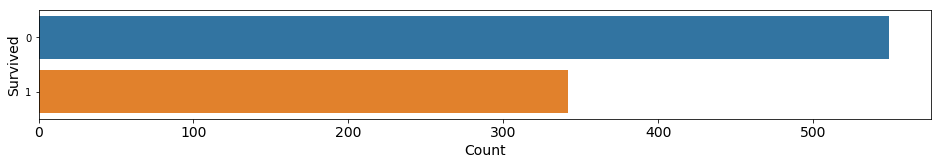

In [12]:
fig = plt.figure(figsize=(16,2))
sns.countplot(y='Survived', data=df_train)
plt.ylabel('Survived', fontsize=14)
plt.xlabel('Count', fontsize=14)
plt.xticks(fontsize=14)
plt.show()

In [13]:
df_bin = pd.DataFrame()
df_con = pd.DataFrame()

In [14]:
df_bin['Survived'] = df_train.Survived
df_con['Survived'] = df_train.Survived

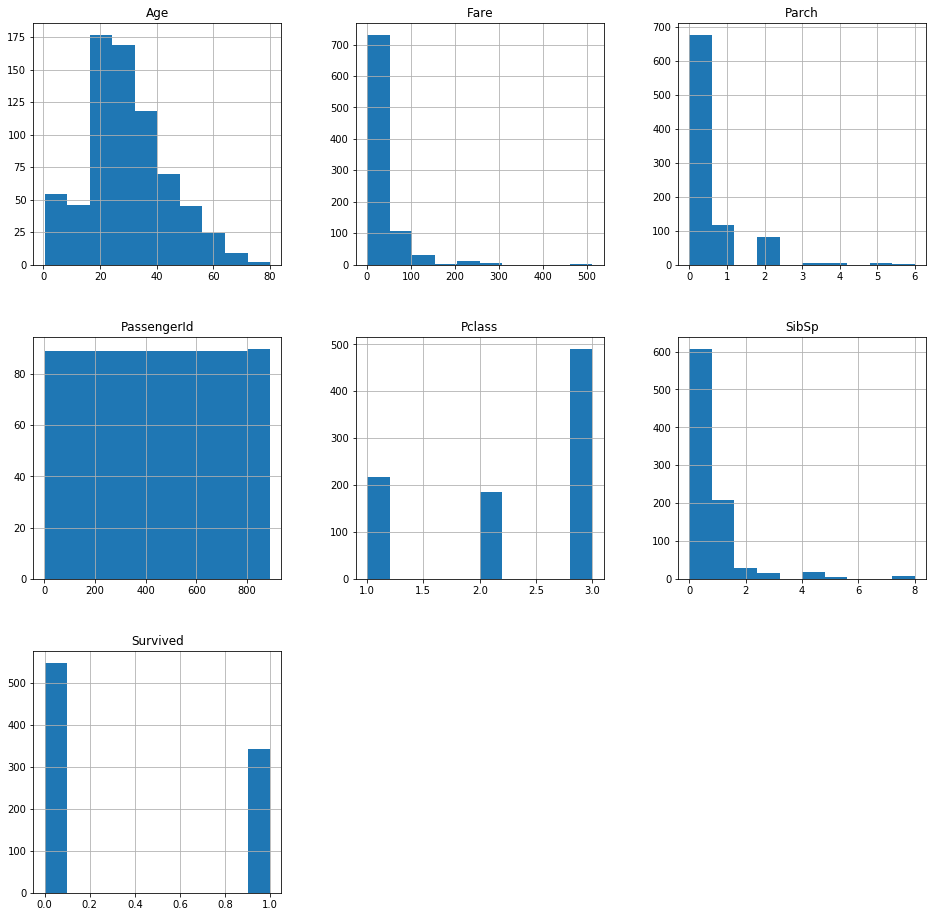

In [15]:
df_train.hist(figsize=(16,16))
plt.show()

# 2. Data Wrangling

## 2.1. Feature Engineering / Cleaning

In [16]:
def title_creation(df):
    
    df['Title'] = df['Name'].str.extract(' ([A-z,a-z]+)\.', expand=False)
    
    df_titles = pd.DataFrame(df['Title'].value_counts())    
    df_titles.rename(columns={'Title':'Count'}, inplace=True)
    df_titles.reset_index(inplace=True)
    df_titles.rename(columns={'index':'Title'}, inplace=True)
    
    df['title_cat'] = df_train['Title']
    df['title_cat'].replace(to_replace=['Dr',
                                        'Rev',
                                        'Mlle',
                                        'Major',
                                        'Col',
                                        'Mme',
                                        'Sir',
                                        'Don',
                                        'Jonkheer',
                                        'Countess',
                                        'Lady',
                                        'Capt',
                                        'Ms'],
                                         value=0, inplace=True)
    df.title_cat.replace(to_replace='Mr', value=1, inplace=True)
    df.title_cat.replace(to_replace='Miss', value=2, inplace=True)
    df.title_cat.replace(to_replace='Mrs', value=3, inplace=True)
    df.title_cat.replace(to_replace='Master', value=4, inplace=True)

In [17]:
title_creation(df_train)

In [18]:
title_creation(df_test)

In [19]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,title_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1


In [20]:
def fill_age(df):
    
    df['Age'] = df.groupby('Title')['Age']\
                            .apply(lambda x: x.fillna(x.mean()))
    
    df['Age'] = df.groupby('Sex')['Age']\
                            .apply(lambda x: x.fillna(x.mean()))

In [21]:
fill_age(df_train)
df_train.Age.isnull().sum()

0

In [22]:
fill_age(df_test)
df_test.Age.isnull().sum()

0

In [23]:
def sex_encoder(df):
    
    for i in df.index:
        if df.loc[i, 'Sex'] == 'male':
            df.loc[i, 'Sex'] = 1
        else:
            df.loc[i, 'Sex'] = 0

In [24]:
sex_encoder(df_train)

In [25]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,title_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,1


In [26]:
df_train.Sex = df_train.Sex.astype(int)

In [27]:
sex_encoder(df_test)

In [28]:
df_test.Sex = df_test.Sex.astype(int)

# 3. Modelling

## 3.1. Scaling Data

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
num_columns =['Sex',
              'Age',
              'SibSp', 
              'Parch',
              'Fare',
              'title_cat']

df_train[num_columns] = scaler.fit_transform(df_train[num_columns])

## 3.2. Train-Test Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df_train[['title_cat','Age','Pclass','SibSp','Sex']]
y = df_train[['Survived']]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=50)

## 3.3. Modelling Functions

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [68]:
def scores(model, X_train, X_val, y_train, y_val):
    
    train_prob = model.predict_proba(X_train)[:,1]
    train_r_squared = model.score(X_train, y_train)
    
    val_prob = model.predict_proba(X_val)[:,1]
    val_r_squared = model.score(X_val, y_val)
    
    train = roc_auc_score(y_train, train_prob)
    val = roc_auc_score(y_val, val_prob)
    
    print(f'AUC Train: {round(train,2)}')
    print(f'AUC Val: {round(val,2)}')
    print('\n')
    print(f'r^2 Train: {round(train_r_squared,2)}')
    print(f'r^2 Val: {round(val_r_squared,2)}')
    print('\n')

In [59]:
def annot(fpr,tpr,thr):
    k=0
    for i,j in zip(fpr,tpr):
        if k %50 == 0:
            plt.annotate(round(thr[k],2),xy=(i,j), textcoords='data')
        k+=1

In [60]:
def roc_plot(model, X_train, X_val, y_train, y_val):
    
    train_prob = model.predict_proba(X_train)[:,1]
    val_prob = model.predict_proba(X_val)[:,1]
    plt.figure(figsize=(7,7))
    for data in [[y_train, train_prob],[y_val, val_prob]]:
        fpr, tpr, thresh = roc_curve(data[0], data[1])
        plt.plot(fpr, tpr)
    annot(fpr, tpr, thresh)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.ylabel('TPR (power)')
    plt.xlabel('FPR (alpha)')
    plt.legend(['Train','Val'])
    plt.show()

In [61]:
def opt_hype_plot(opt_model):
    opt = pd.DataFrame(opt_model.cv_results_)
    cols = [col for col in opt.columns if (
        'mean' in col or 'std' in col) and 'time' not in col]
    params = pd.DataFrame(list(opt.params))
    opt = pd.concat([params,opt[cols]],axis=1,sort=False)
    
    plt.figure(figsize=[15,4])
    plt.subplot(121)
    sns.heatmap(pd.pivot_table(opt,
                               index='max_depth',
                               columns='min_samples_leaf',
                               values='mean_train_score')*100)
    plt.title('ROC_AUC - Training')
    plt.subplot(122)
    sns.heatmap(pd.pivot_table(opt,
                               index='max_depth',
                               columns='min_samples_leaf',
                               values='mean_test_score')*100)
    plt.title('ROC_AUC - Validation')

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [63]:
skf = StratifiedKFold(n_splits=5,random_state=50)

## 3.1. Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

AUC Train: 0.87
AUC Val: 0.88


r^2 Train: 0.83
r^2 Val: 0.82




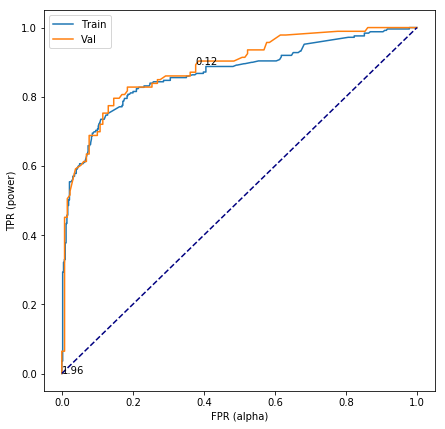

In [69]:
scores(log_reg, X_train, X_test, y_train, y_test)
roc_plot(log_reg, X_train, X_test, y_train, y_test)

In [67]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
# %%time
# param_grid = {'l2':[0,10,100,1000]}

# opt_model = GridSearchCV(log_reg, param_grid, cv=skf, scoring='roc_auc', return_train_score=True, n_jobs=-1)
# opt_model.fit(X_train,y_train)
# best_model = opt_model.best_estimator_

# scores(best_model,X_train,X_val,y_train,y_val)
# print(opt_model.best_params_)
# opt_plots(opt_model)

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

AUC Train: 0.98
AUC Val: 0.75


r^2 Train: 0.93
r^2 Val: 0.79




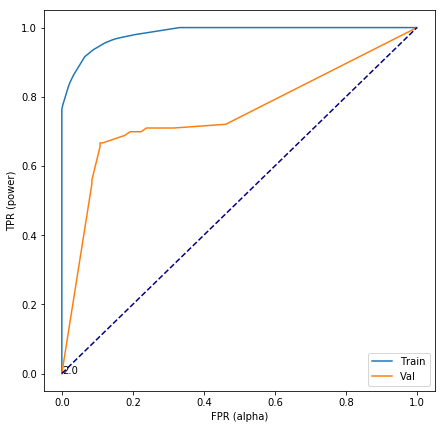

In [80]:
scores(dtree, X_train, X_test, y_train, y_test)
roc_plot(dtree, X_train, X_test, y_train, y_test)

AUC Train: 0.77
AUC Val: 0.78


r^2 Train: 0.79
r^2 Val: 0.78


{'max_depth': 1, 'min_samples_leaf': 5}
CPU times: user 193 ms, sys: 9.51 ms, total: 202 ms
Wall time: 231 ms


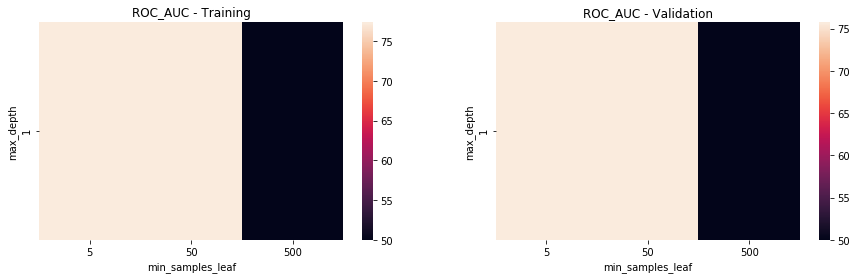

In [89]:
%%time
param_grid = {'max_depth':range(1,11,10),'min_samples_leaf':[5,50,500]}

opt_model = GridSearchCV(dtree,param_grid,cv=skf,scoring='roc_auc',return_train_score=True,n_jobs=-1)
opt_model.fit(X_train,y_train)
best_model = opt_model.best_estimator_

scores(best_model,X_train,X_test,y_train,y_test)
print(opt_model.best_params_)
opt_hype_plot(opt_model)

In [279]:
from sklearn import tree

In [280]:
# plt.figure(figsize=(16,16))
# tree.plot_tree(dtree)
# plt.show()

In [281]:
from sklearn.ensemble import RandomForestClassifier

In [287]:
%%time

rand_forr = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rand_forr.fit(X_train, y_train)
print(f'Train score: {rand_forr.score(X_train, y_train)}')
print(f'Test score: {rand_forr.score(X_test, y_test)}')

Train score: 0.9281437125748503
Test score: 0.8071748878923767
CPU times: user 921 ms, sys: 343 ms, total: 1.26 s
Wall time: 908 ms


In [288]:
import xgboost

In [289]:
%%time

xgb_reg = xgboost.XGBClassifier()
xgb_reg.fit(X_train, y_train)
print(f'Train score: {xgb_reg.score(X_train, y_train)}')
print(f'Test score: {xgb_reg.score(X_test, y_test)}')

Train score: 0.8637724550898204
Test score: 0.8251121076233184
CPU times: user 33.2 ms, sys: 1.88 ms, total: 35.1 ms
Wall time: 33.5 ms


In [290]:
from sklearn.ensemble import BaggingClassifier

In [291]:
%%time

bag_clf_dtree = BaggingClassifier(DecisionTreeClassifier(),
                                 n_estimators=500,
                                 max_samples=100,
                                 bootstrap=True,
                                 n_jobs=-1)
bag_clf_dtree.fit(X_train, y_train)
print(f'Train score: {bag_clf_dtree.score(X_train, y_train)}')
print(f'Test score: {bag_clf_dtree.score(X_test, y_test)}')

Train score: 0.8667664670658682
Test score: 0.8340807174887892
CPU times: user 395 ms, sys: 113 ms, total: 508 ms
Wall time: 1.84 s


In [292]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

In [293]:
%%time

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(
                    estimators=[('lr', log_clf),
                                ('rf', rnd_clf),
                                ('svc', svm_clf)],
                    voting='soft')
voting_clf.fit(X_train, y_train)
print(f'Train score: {voting_clf.score(X_train, y_train)}')
print(f'Test score: {voting_clf.score(X_test, y_test)}')

Train score: 0.8607784431137725
Test score: 0.8295964125560538
CPU times: user 993 ms, sys: 11.9 ms, total: 1.01 s
Wall time: 209 ms


In [294]:
from deslib.static.stacked import StackedClassifier

In [295]:
%%time

log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)

rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train, y_train)

svm_clf = SVC(probability=True)
svm_clf.fit(X_train, y_train)

stack_clf = StackedClassifier(pool_classifiers=[log_clf,
                                                rnd_clf, 
                                                svm_clf])
stack_clf.fit(X_train, y_train)
print(f'Train score: {stack_clf.score(X_train, y_train)}')
print(f'Test score: {stack_clf.score(X_test, y_test)}')

Train score: 0.9281437125748503
Test score: 0.8161434977578476
CPU times: user 1.15 s, sys: 13.9 ms, total: 1.17 s
Wall time: 221 ms
